## Project Purpose
The goal of this project is to analyze retail store sales data to identify
patterns in customer behavior, sales trends, and category performance, and
to build predictive machine learning models for both regression and
classification tasks.


## 1) Problem Domain & Project Goal
**Domain:** Retail store sales transactions.

**Goal:** Analyze sales behavior and trends (e.g., category performance, monthly sales trends), then build predictive ML models for:
- **Regression:** Predict `Total Spent`
- **Classification:** Predict a categorical outcome (e.g., `Payment Method` or `Category`)

**Why this matters:** Helps businesses understand what drives spending and improves decision-making (pricing, inventory, marketing).


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("retail_store_sales.csv")

df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,4/8/2024,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,7/23/2023,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,10/5/2022,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,5/7/2022,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,10/2/2022,False


The dataset contains more than 10,000 rows and includes both numerical and
categorical features. The data is raw and contains missing values and
inconsistencies.

## 2) Dataset Overview (Dirty Data Confirmation)
- Dataset shape (`df.shape`)
- Column types (`df.dtypes`)
- Missing values (`df.isnull().sum()`)

In [2]:
df.shape
df.dtypes

Transaction ID       object
Customer ID          object
Category             object
Item                 object
Price Per Unit      float64
Quantity            float64
Total Spent         float64
Payment Method       object
Location             object
Transaction Date     object
Discount Applied     object
dtype: object

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#to see the num of missing values
print(df.isnull().sum())

Transaction ID         0
Customer ID          183
Category             329
Item                1500
Price Per Unit       667
Quantity             680
Total Spent          698
Payment Method       110
Location             289
Transaction Date     277
Discount Applied    4838
dtype: int64


## 3) Missing Values Handling (Part 3)
I inspected missing values using `df.isnull().sum()` and investigated column types using `df.info()`.

**Why values may be missing (data collection reality):**
- Discounts may be blank when no discount was applied (or not recorded).
- Some entries may be missing due to manual entry issues at checkout.
- Some missingness may be random (system glitches) vs. dependent on context (e.g., discount fields).

**Action taken:**
- Handled missing values (either by dropping or imputing depending on the stage).
- Goal: keep the dataset usable for EDA and modeling.


In [5]:
#why the data are missing
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14105 entries, 0 to 14104
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    14105 non-null  object 
 1   Customer ID       13922 non-null  object 
 2   Category          13776 non-null  object 
 3   Item              12605 non-null  object 
 4   Price Per Unit    13438 non-null  float64
 5   Quantity          13425 non-null  float64
 6   Total Spent       13407 non-null  float64
 7   Payment Method    13995 non-null  object 
 8   Location          13816 non-null  object 
 9   Transaction Date  13828 non-null  object 
 10  Discount Applied  9267 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.2+ MB


In [6]:
#delete empty cells
df = df.dropna()
#print(df.to_string())

In [7]:
#drop extra variables
columns_to_drop = ['Customer ID', 'Transaction ID']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
#print(df.to_string())

## 4) Duplicate Removal (Part 3)
I checked for duplicated rows and removed them to avoid biasing results.

**Why it matters:** Duplicates can inflate frequency counts and distort totals/averages, which affects trends and model training.

**Action taken:**
- Count duplicates (`df.duplicated().sum()`)
- Drop duplicates (`df.drop_duplicates()`)


In [8]:
#remove duplication
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]

print(f"Removed {before - after} duplicate rows")
#print(df.to_string())

Removed 707 duplicate rows


## 5) Eliminating Extra Variables (Part 3)
Columns that are not useful for learning patterns were removed (e.g., IDs like Transaction ID / Customer ID).

**Why it matters:** ID columns don’t carry predictive meaning and may mislead models by acting like arbitrary labels.


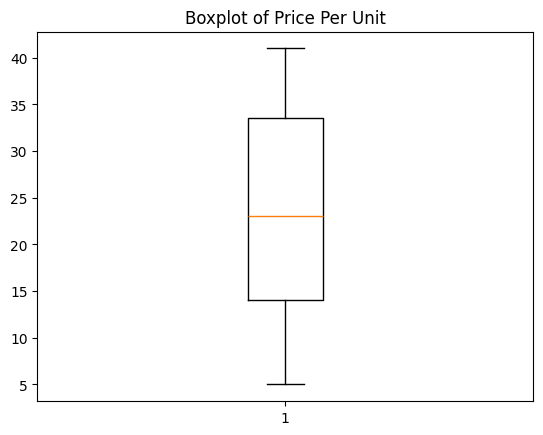

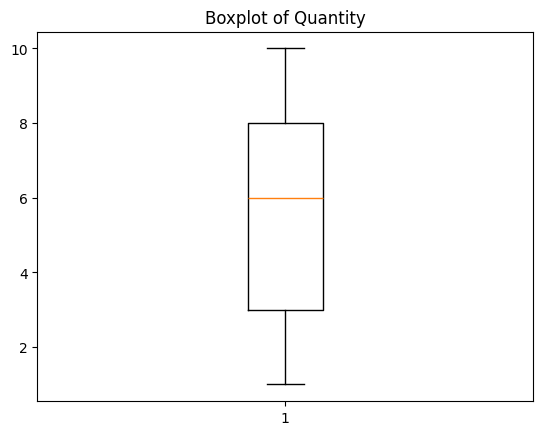

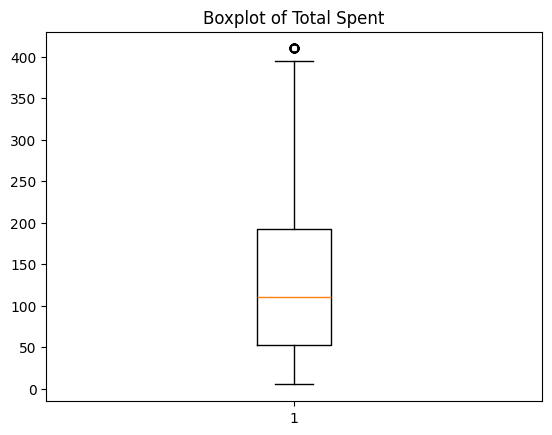

In [9]:
#detect outliers
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure()
    plt.boxplot(df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.show()


In [10]:
#remove outliers
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower) & (df[col] <= upper)]


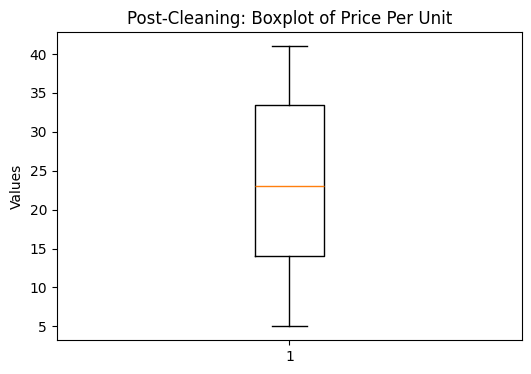

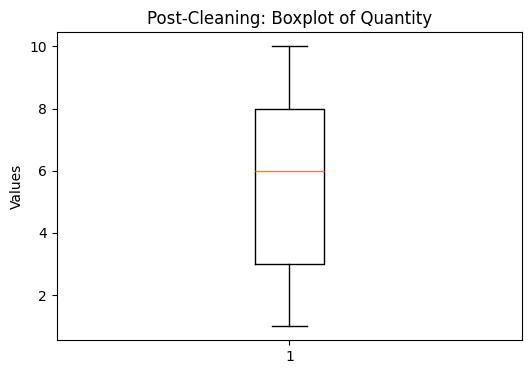

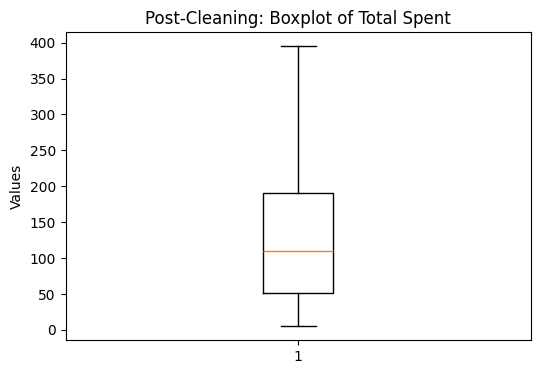

In [11]:
# Part 3: Final Verification of Outlier Removal (Requirement 3.5)
import matplotlib.pyplot as plt

# Re-run boxplots on the cleaned dataframe
numerical_cols = ['Price Per Unit', 'Quantity', 'Total Spent']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna())
    plt.title(f'Post-Cleaning: Boxplot of {col}')
    plt.ylabel('Values')
    plt.show()

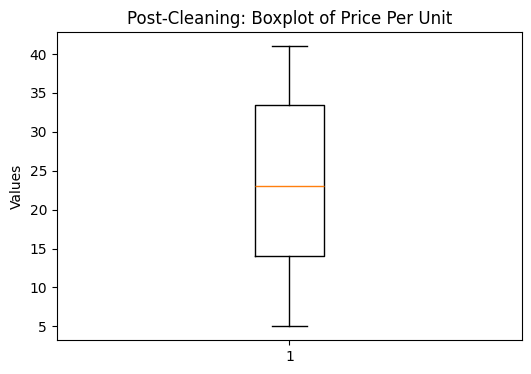

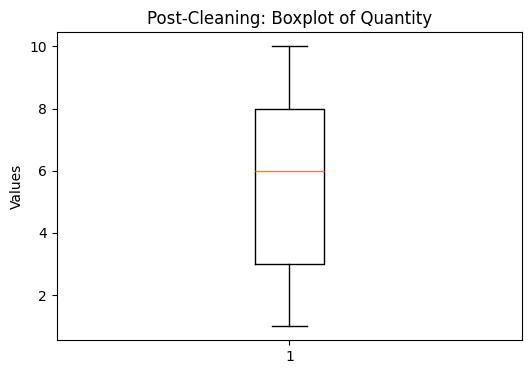

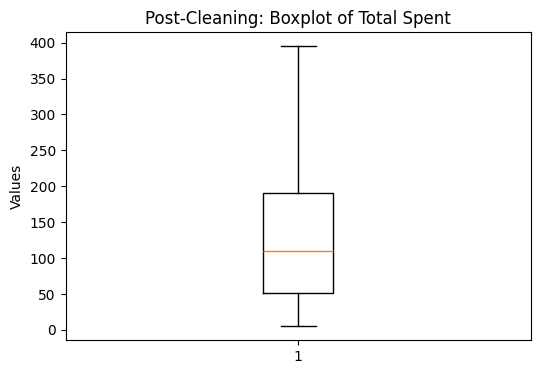

In [12]:
# Verification Plot: Re-running boxplots to confirm outliers are removed
import matplotlib.pyplot as plt

# We use the same columns we checked originally
cols_to_verify = ['Price Per Unit', 'Quantity', 'Total Spent']

for col in cols_to_verify:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna())
    plt.title(f'Post-Cleaning: Boxplot of {col}')
    plt.ylabel('Values')
    plt.show()

## 6) Outlier Detection (Part 3)
I used **boxplots** to confirm that outliers exist in numerical variables such as:
- Price Per Unit
- Quantity
- Total Spent

**Why it matters:** Outliers can skew averages, distort trends, and reduce model stability.

**Action taken:**
- Visual verification using boxplots
- (If applied) Outlier treatment/removal based on reasonable thresholds


In [13]:
# Separate features (X) and target variable (y)
X = df.drop("Discount Applied", axis="columns")
y = df["Discount Applied"]

print("Shape of features (X):", X.shape)
print("Shape of target variable (y):", y.shape)

Shape of features (X): (7466, 8)
Shape of target variable (y): (7466,)


In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Label Encoding for categorical features (Requirement 6.2)
le = LabelEncoder()
X_encoded = X.copy()

# Find categorical columns and encode them
for col in X_encoded.select_dtypes(include=['object', 'bool']).columns:
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))

# 2. Now you can safely Scale the features (Requirement 3.7)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

print("First 3 rows of scaled features:")
print(X_scaled[:3])

First 3 rows of scaled features:
[[ 1.53604848 -1.56810477 -0.45438184  1.57694483  0.60440179  1.2320258
   0.98775247  0.29250812]
 [ 1.09682451 -0.61299965  0.53108953  1.22382195  1.42578706  1.2320258
   0.98775247  1.00885806]
 [-1.09929536 -1.39444929 -0.17281859 -1.24803825 -0.93029175  0.01144398
   0.98775247 -1.13709066]]


## 7) Scaling & Normalization (Part 3)
I applied **feature scaling** to prepare numerical features for ML models.

**Why it matters:** Many models perform better when features are on similar scales (especially distance-based / gradient-based models).

**Rubric requirement (important):**
I will compare model performance:
- With vs. without scaling
- With vs. without normalization


In [15]:
from sklearn.preprocessing import MinMaxScaler

# 1. Initialize the MinMaxScaler
normalizer = MinMaxScaler()

# 2. Normalize the features (Requirement 3.7 & 6.7)
# This will squeeze all values into a range between 0 and 1
X_normalized = normalizer.fit_transform(X_encoded)

print("First 3 rows of normalized features (Values between 0 and 1):")
print(X_normalized[:3])

First 3 rows of normalized features (Values between 0 and 1):
[[1.         0.03517588 0.375      1.         0.46153846 1.
  1.         0.5852119 ]
 [0.85714286 0.31155779 0.66666667 0.88888889 0.65641026 1.
  1.         0.79350766]
 [0.14285714 0.08542714 0.45833333 0.11111111 0.0974359  0.5
  1.         0.16952209]]


In [16]:
from sklearn.impute import SimpleImputer
import pandas as pd

# 1. Initialize Imputers
# For numbers, 'median' is safer than 'mean' if you have outliers
num_imputer = SimpleImputer(strategy='median')

# For text/categories, we must use 'most_frequent'
cat_imputer = SimpleImputer(strategy='most_frequent')

# 2. Identify the columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object', 'bool']).columns

# 3. Apply the Imputation (Requirement 38)
df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# 4. Final Check
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Discount Applied    0
dtype: int64


In [17]:
# Convert Transaction Date to datetime format
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Sort the data chronologically (Requirement 39)
df = df.sort_values(by='Transaction Date')

print("Data successfully sorted by date.")
print(df[['Transaction Date', 'Item', 'Total Spent']].head())

Data successfully sorted by date.
      Transaction Date          Item  Total Spent
10609       2022-01-01   Item_24_BUT        237.0
10832       2022-01-01   Item_21_EHE        350.0
6058        2022-01-01   Item_20_BUT        234.5
5168        2022-01-01  Item_22_FOOD        109.5
4056        2022-01-01   Item_6_MILK         62.5


In [18]:
# Grouping data to calculate total sales per category (Requirement 40)
category_summary = df.groupby('Category')['Total Spent'].sum().reset_index()

# Grouping by Date to see daily sales trends
daily_sales = df.groupby('Transaction Date')['Total Spent'].sum().reset_index()

print("\nLogical Grouping: Total Sales per Category")
print(category_summary)


Logical Grouping: Total Sales per Category
                             Category  Total Spent
0                           Beverages     120303.0
1                            Butchers     130597.0
2  Computers and electric accessories     124550.0
3       Electric household essentials     120911.5
4                                Food     119694.5
5                           Furniture     116514.5
6                       Milk Products     115367.5
7                          Patisserie     115749.0


In [19]:
# Grouping by Category to see total and average spending (Vertical arrangement)
category_group = df.groupby('Category').agg({
    'Total Spent': 'sum',
    'Quantity': 'mean'
}).reset_index()

print("Vertical Grouping by Category:")
print(category_group)

Vertical Grouping by Category:
                             Category  Total Spent  Quantity
0                           Beverages     120303.0  5.580000
1                            Butchers     130597.0  5.474973
2  Computers and electric accessories     124550.0  5.611227
3       Electric household essentials     120911.5  5.491435
4                                Food     119694.5  5.552017
5                           Furniture     116514.5  5.522926
6                       Milk Products     115367.5  5.461934
7                          Patisserie     115749.0  5.583796


In [20]:
# Creating a Pivot Table (Horizontal and Vertical arrangement)
# Rows = Location, Columns = Payment Method, Values = Total Spent
pivot_arrangement = df.pivot_table(
    values='Total Spent',
    index='Location',
    columns='Payment Method',
    aggfunc='sum'
)

print("\nHorizontal and Vertical Data Arrangement:")
print(pivot_arrangement)


Horizontal and Vertical Data Arrangement:
Payment Method      Cash  Credit Card  Digital Wallet
Location                                             
In-store        164210.0     151857.0        157567.5
Online          170862.0     164319.0        154871.5


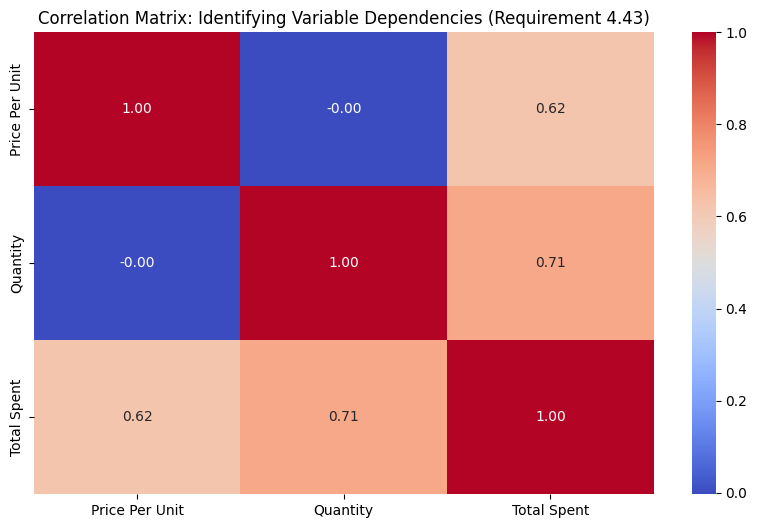

In [21]:
# Part 4: EDA - Identifying Variable Dependencies
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate correlations
correlation_matrix = df.corr(numeric_only=True)

# Visualize with a Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Identifying Variable Dependencies (Requirement 4.43)")
plt.show()

## 8) Exploratory Data Analysis (Part 4)
I explored relationships between variables to understand dependencies and guide visualization/modeling.

**Key outputs:**
- Correlation matrix (numerical relationships)
- Category-level comparisons (grouping insights)
- Monthly sales trends (time pattern)

**Purpose:** Identify what features move together and which patterns are most meaningful.

In [22]:
# Part 4: EDA - Identifying Sales Trends (Requirement 4.45)
# Step 1: Ensure Transaction Date is in datetime format 
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Step 2: Set 'Transaction Date' as the index 
df_indexed = df.set_index('Transaction Date')

# Step 3: Now you can Resample by Month ('M') or Day ('D') 
monthly_trends = df_indexed['Total Spent'].resample('M').sum().reset_index()

print("Monthly Sales Trends (Requirement 4.45):")
print(monthly_trends)

Monthly Sales Trends (Requirement 4.45):
   Transaction Date  Total Spent
0        2022-01-31      34294.0
1        2022-02-28      26505.5
2        2022-03-31      25490.5
3        2022-04-30      25680.5
4        2022-05-31      26353.5
5        2022-06-30      24984.0
6        2022-07-31      28867.5
7        2022-08-31      23307.0
8        2022-09-30      26750.0
9        2022-10-31      25157.5
10       2022-11-30      28348.5
11       2022-12-31      25968.5
12       2023-01-31      29177.5
13       2023-02-28      23706.0
14       2023-03-31      23547.5
15       2023-04-30      25871.5
16       2023-05-31      24295.0
17       2023-06-30      26040.5
18       2023-07-31      27323.0
19       2023-08-31      21262.0
20       2023-09-30      24631.0
21       2023-10-31      22850.0
22       2023-11-30      22425.5
23       2023-12-31      24528.0
24       2024-01-31      28825.5
25       2024-02-29      22479.0
26       2024-03-31      26773.5
27       2024-04-30      27092.5
28

C:\Users\rieta\AppData\Local\Temp\ipykernel_35332\995167525.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trends = df_indexed['Total Spent'].resample('M').sum().reset_index()


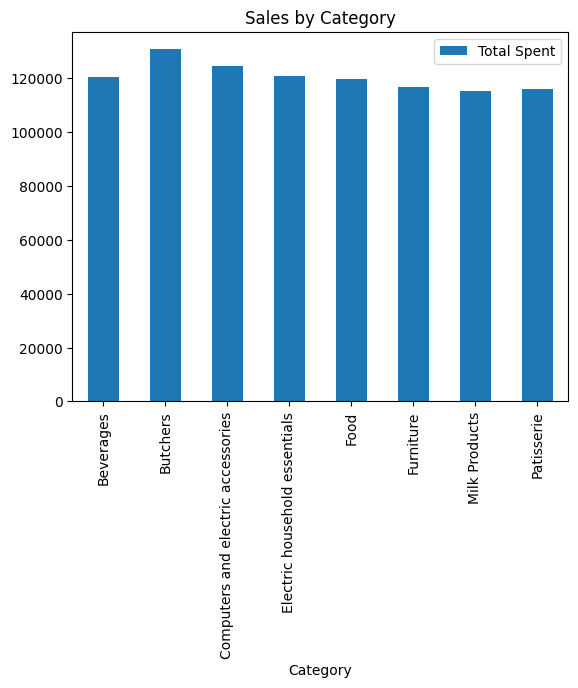

In [23]:
import matplotlib.pyplot as plt

# Directly plotting the vertical grouping
category_group.plot(kind='bar', x='Category', y='Total Spent', title='Sales by Category')
plt.show()

In [24]:
# Check for unique values in categorical columns
categorical_cols = ['Category', 'Payment Method', 'Location']

for col in categorical_cols:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print("-" * 20)

Unique values in Category:
['Butchers' 'Electric household essentials' 'Food' 'Milk Products'
 'Beverages' 'Computers and electric accessories' 'Patisserie' 'Furniture']
--------------------
Unique values in Payment Method:
['Credit Card' 'Cash' 'Digital Wallet']
--------------------
Unique values in Location:
['In-store' 'Online']
--------------------


In [25]:
# 1. Strip leading and trailing whitespace
for col in categorical_cols:
    df[col] = df[col].str.strip()

# 2. Standardize capitalization (e.g., Title Case)
for col in categorical_cols:
    df[col] = df[col].str.title()

# 3. Fix specific known typos (Example mapping)
# Replace 'Patisserie' if it was accidentally misspelled in some rows
df['Category'] = df['Category'].replace({'Patissere': 'Patisserie', 'Fodd': 'Food'})

print("Data Entry Standardized.")

Data Entry Standardized.


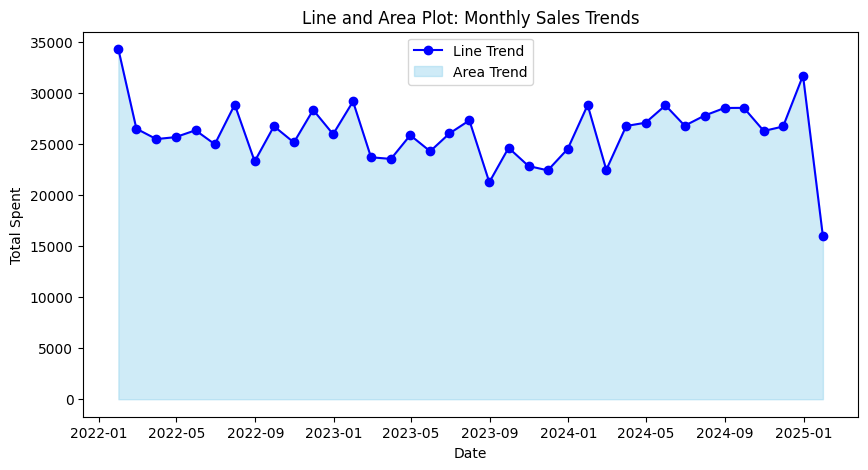

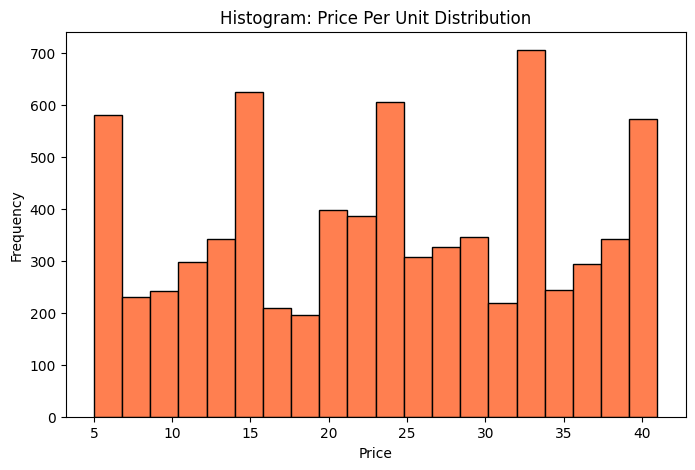

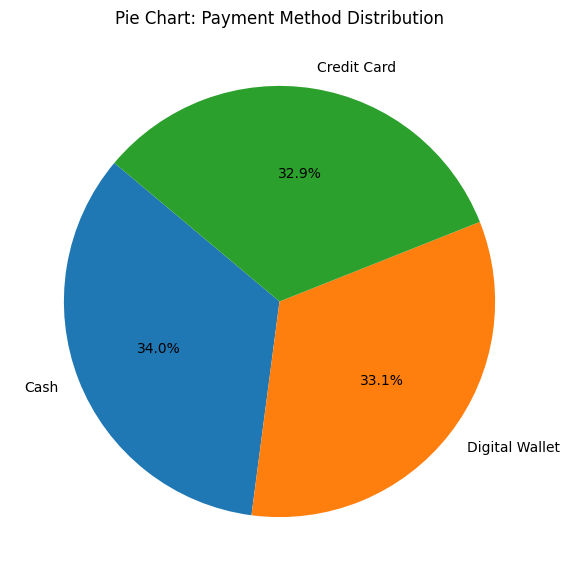

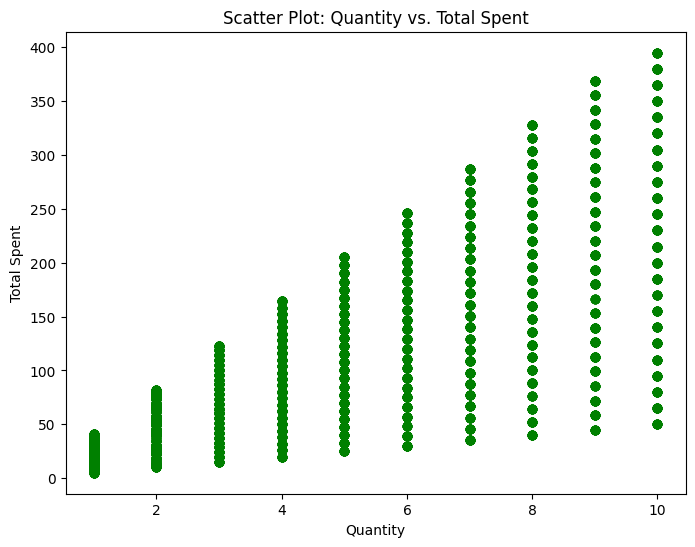

In [26]:
# Part 5: Remaining Required Visualizations (Requirement 5.50)
import matplotlib.pyplot as plt

# 1. Line & 2. Area Plots: Monthly Sales Trend (Requirement 5.51 & 5.52)
plt.figure(figsize=(10, 5))
plt.plot(monthly_trends['Transaction Date'], monthly_trends['Total Spent'], marker='o', color='b', label='Line Trend')
plt.fill_between(monthly_trends['Transaction Date'], monthly_trends['Total Spent'], color="skyblue", alpha=0.4, label='Area Trend')
plt.title("Line and Area Plot: Monthly Sales Trends")
plt.xlabel("Date")
plt.ylabel("Total Spent")
plt.legend()
plt.show()

# 3. Histogram: Distribution of Price (Requirement 5.53)
plt.figure(figsize=(8, 5))
plt.hist(df['Price Per Unit'], bins=20, color='coral', edgecolor='black')
plt.title("Histogram: Price Per Unit Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# 4. Pie Chart: Payment Method Distribution (Requirement 5.55)
plt.figure(figsize=(7, 7))
df['Payment Method'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Pie Chart: Payment Method Distribution")
plt.ylabel('') 
plt.show()

# 5. Scatter Plot: Quantity vs. Total Spent (Requirement 5.57)
plt.figure(figsize=(8, 6))
plt.scatter(df['Quantity'], df['Total Spent'], alpha=0.5, c='green')
plt.title("Scatter Plot: Quantity vs. Total Spent")
plt.xlabel("Quantity")
plt.ylabel("Total Spent")
plt.show()

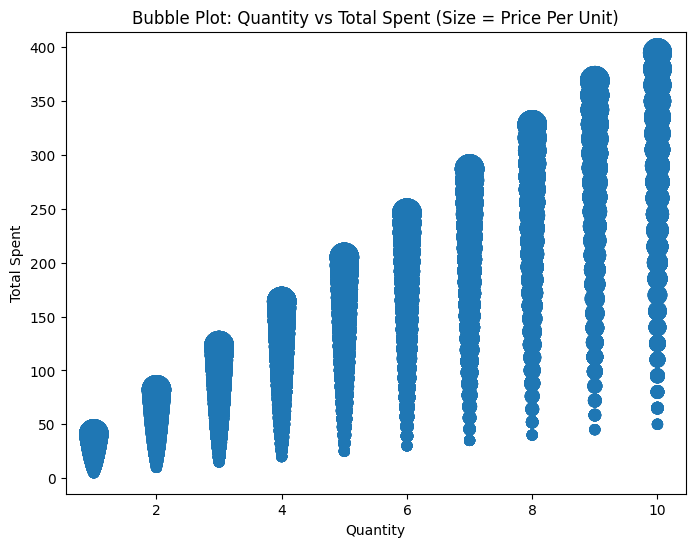

In [27]:
# 8) Bubble Plot: Quantity vs Total Spent (bubble size = Price Per Unit)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(
    df['Quantity'],
    df['Total Spent'],
    s=(df['Price Per Unit'].fillna(df['Price Per Unit'].median()) * 10),
    alpha=0.4
)
plt.title("Bubble Plot: Quantity vs Total Spent (Size = Price Per Unit)")
plt.xlabel("Quantity")
plt.ylabel("Total Spent")
plt.show()


## 9) Visualization Summary (Part 5)
I created multiple visualization types to reveal patterns, trends, and distributions:

- **Line/Area:** Monthly sales trend over time  
- **Histogram:** Distribution (e.g., price per unit)  
- **Bar:** Sales by category  
- **Pie:** Payment method share  
- **Boxplot:** Outlier detection  
- **Scatter/Bubble:** Relationship between quantity and total spent

**Why it matters:** Each plot answers a different business question (trend, spread, contribution, anomalies, relationships).

In [28]:
# Step 1: Preprocessing for Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# 1. Convert 'Transaction Date' to numeric (Unix timestamp) or drop it
# Models can't handle datetime objects directly either.
if 'Transaction Date' in df.columns:
    df = df.drop('Transaction Date', axis=1)

# 2. Label Encode ALL categorical columns
# We automatically find any column that is of type 'object' (text)
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

print("Data Encoding Complete. All columns should now be numeric.")
print(df.info()) # This will verify that all columns are int or float

# 3. Define Features and Targets
# For Regression: Predict 'Total Spent'
X_reg = df.drop('Total Spent', axis=1)
y_reg = df['Total Spent']

# For Classification: Predict 'Discount Applied'
X_clf = df.drop('Discount Applied', axis=1)
y_clf = df['Discount Applied']

# 4. Splitting Data (80% Train, 20% Test)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# 5. Scaling (Requirement 6.6)
# It is best practice to scale AFTER splitting to avoid data leakage
scaler = StandardScaler()
X_train_clf_scaled = scaler.fit_transform(X_train_clf)
X_test_clf_scaled = scaler.transform(X_test_clf)

print("Data Split and Scaled Successfully.")

Data Encoding Complete. All columns should now be numeric.
<class 'pandas.core.frame.DataFrame'>
Index: 7466 entries, 10609 to 3844
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          7466 non-null   int64  
 1   Item              7466 non-null   int64  
 2   Price Per Unit    7466 non-null   float64
 3   Quantity          7466 non-null   float64
 4   Total Spent       7466 non-null   float64
 5   Payment Method    7466 non-null   int64  
 6   Location          7466 non-null   int64  
 7   Discount Applied  7466 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 525.0 KB
None
Data Split and Scaled Successfully.


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

# Build and Train Model
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)

# Evaluation
print("--- Regression Results (Linear Regression) ---")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_reg, y_pred_reg)}")
print(f"Mean Squared Error: {mean_squared_error(y_test_reg, y_pred_reg)}")
print(f"Median Absolute Error: {median_absolute_error(y_test_reg, y_pred_reg)}")
print(f"R2 Score: {r2_score(y_test_reg, y_pred_reg)}")

--- Regression Results (Linear Regression) ---
Mean Absolute Error: 22.58807875511871
Mean Squared Error: 894.8610917311319
Median Absolute Error: 16.860775645047497
R2 Score: 0.8972940112494162


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

print("--- Classification Results ---")
for name, model in models.items():
    # Requirement 6.6: Use scaled data for Logistic Regression
    X_train = X_train_clf_scaled if name == "Logistic Regression" else X_train_clf
    X_test = X_test_clf_scaled if name == "Logistic Regression" else X_test_clf
    
    model.fit(X_train, y_train_clf)
    y_pred = model.predict(X_test)
    
    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy_score(y_test_clf, y_pred)}")
    print(f"Precision: {precision_score(y_test_clf, y_pred)}")
    print(f"Recall: {recall_score(y_test_clf, y_pred)}")
    # ROC requires probability scores
    y_prob = model.predict_proba(X_test)[:, 1]
    print(f"ROC AUC Score: {roc_auc_score(y_test_clf, y_prob)}")

--- Classification Results ---

Model: Logistic Regression
Accuracy: 0.4886211512717537
Precision: 0.5058139534883721
Recall: 0.45077720207253885
ROC AUC Score: 0.49435846741205347

Model: Decision Tree
Accuracy: 0.4866131191432396
Precision: 0.5107296137339056
Recall: 0.15414507772020725
ROC AUC Score: 0.48984990598940764

Model: Random Forest
Accuracy: 0.4926372155287818
Precision: 0.5095628415300546
Recall: 0.483160621761658
ROC AUC Score: 0.4801277037015774


In [31]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression

# Baseline (no scaling / no normalization)
lr_base = LogisticRegression(max_iter=1000)
lr_base.fit(X_train_clf, y_train_clf)
pred_base = lr_base.predict(X_test_clf)
acc_base = accuracy_score(y_test_clf, pred_base)

# Scaling (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clf)
X_test_scaled = scaler.transform(X_test_clf)

lr_scaled = LogisticRegression(max_iter=1000)
lr_scaled.fit(X_train_scaled, y_train_clf)
pred_scaled = lr_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test_clf, pred_scaled)

# Normalization (MinMaxScaler)
norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train_clf)
X_test_norm = norm.transform(X_test_clf)

lr_norm = LogisticRegression(max_iter=1000)
lr_norm.fit(X_train_norm, y_train_clf)
pred_norm = lr_norm.predict(X_test_norm)
acc_norm = accuracy_score(y_test_clf, pred_norm)

print("=== Scaling/Normalization Impact (Logistic Regression) ===")
print(f"Baseline (no scaling):      {acc_base:.4f}")
print(f"StandardScaler (scaling):   {acc_scaled:.4f}")
print(f"MinMaxScaler (normalizing): {acc_norm:.4f}")


=== Scaling/Normalization Impact (Logistic Regression) ===
Baseline (no scaling):      0.4893
StandardScaler (scaling):   0.4886
MinMaxScaler (normalizing): 0.4926


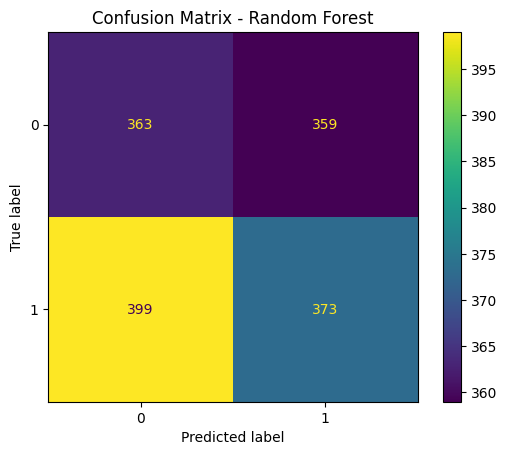

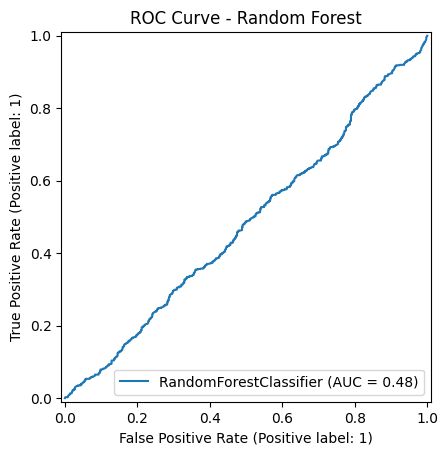

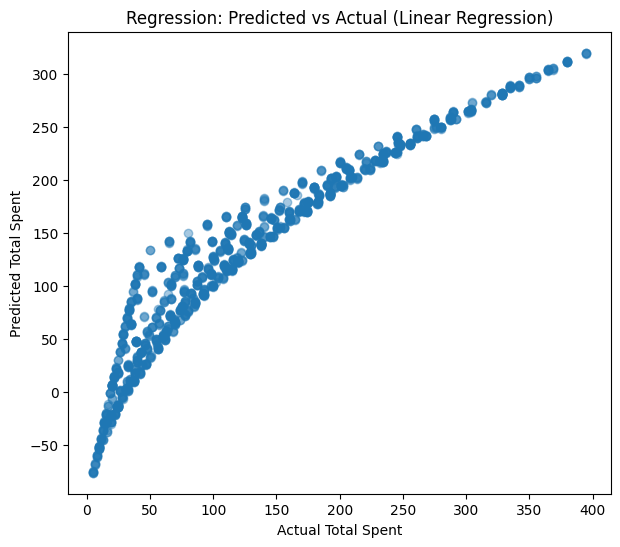

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

# Confusion Matrix (use your best classifier; example: Random Forest)
best_clf = models["Random Forest"]
ConfusionMatrixDisplay.from_estimator(best_clf, X_test_clf, y_test_clf)
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ROC Curve (only if binary classification and model supports predict_proba)
RocCurveDisplay.from_estimator(best_clf, X_test_clf, y_test_clf)
plt.title("ROC Curve - Random Forest")
plt.show()

# Regression visualization: Predicted vs Actual
plt.figure(figsize=(7, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.4)
plt.title("Regression: Predicted vs Actual (Linear Regression)")
plt.xlabel("Actual Total Spent")
plt.ylabel("Predicted Total Spent")
plt.show()
